## In this notebook we analyse the available datasets to determine which ones to use

In [1]:
# reload imported files automatically without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from lib import *
from collections import namedtuple

In [4]:
# define column names for table
column_names = [
    "name",
    "title",
    "nodes",
    "edges",
    "avg_degree",
    "std_dev_degree",
    "largest_eigenvalue_hashimoto",
    "random walk mixing time",
    "degree assortativity",
    "global clustering",
    "pseudo_diameter",
    "relative_size_of_largest_component",
    "kind",
    "mode",
    "number_of_networks",
    "tags",
]

In [5]:
df = pd.read_html("https://networks.skewed.de/")[0] # get a df of all datasets on Netzschleuder

In [6]:
df.columns = column_names # set column names

### We create filters for our categories that we compare

In [7]:
# create dataset filters for social network datasets
social_networks = df["tags"].str.contains("Social")
unweighted = df["tags"].str.contains("Unweighted")
undirected = df["kind"] == "Undirected"
online = df["tags"].str.contains("Online")
offline = df["tags"].str.contains("Offline")

In [9]:
online_social_filter = (online & social_networks & unweighted & undirected) # filter for desired online social networks
offline_social_filter = (offline & social_networks & unweighted & undirected) # filter for desired offline social networks

### We apply filters to filter datasets

**NOTE**: These datasets contain multiple networks, we will filter them further, and from now on call these **network groups**

In [15]:
online_social = df[online_social_filter]
# filter df for social, unweighted, online, undirected networks
len(online_social)
print("Number of online social network groups:", len(online_social))
online_social.head(3)

Number of online social network groups: 15


,name,title,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random walk mixing time,degree assortativity,global clustering,pseudo_diameter,relative_size_of_largest_component,kind,mode,number_of_networks,tags
74,douban,Douban friendship network (2009),154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,1,Social Online Unweighted
82,ego_social,Ego networks in social media (2012),107614,12238285,227.45,581.50,1718.72,110.57,-0.08,0.15,6,1.00,Undirected,Unipartite,143,Social Online Unweighted Metadata
96,facebook_friends,Maier Facebook friends (2014),362,1988,10.98,10.83,23.30,78.68,0.10,0.51,9,0.91,Undirected,Unipartite,1,Social Online Unweighted Metadata


In [16]:
# filter df for social, unweighted, online, undirected networks
offline_social = df[social_networks & offline & unweighted & undirected]
print("Number of offline social network groups:", len(offline_social))
online_social.head(3)

Number of offline social network groups: 17


,name,title,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random walk mixing time,degree assortativity,global clustering,pseudo_diameter,relative_size_of_largest_component,kind,mode,number_of_networks,tags
74,douban,Douban friendship network (2009),154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,1,Social Online Unweighted
82,ego_social,Ego networks in social media (2012),107614,12238285,227.45,581.50,1718.72,110.57,-0.08,0.15,6,1.00,Undirected,Unipartite,143,Social Online Unweighted Metadata
96,facebook_friends,Maier Facebook friends (2014),362,1988,10.98,10.83,23.30,78.68,0.10,0.51,9,0.91,Undirected,Unipartite,1,Social Online Unweighted Metadata


In [17]:
online_social.agg({"nodes": ["mean", "median", "std"], "edges": ["mean", "median", "std"]}).style.format("{:.0f}").set_caption("Online Social Network Groups")

,nodes,edges
mean,5082770,126652876
median,154908,2777419
std,16781456,464657993


In [18]:
offline_social.agg({"nodes": ["mean", "median", "std"], "edges": ["mean", "median", "std"]}).style.format("{:.0f}").set_caption("Offline Social Network Groups")

,nodes,edges
mean,905,192800
median,180,20818
std,2617,416200


### We filter dataset groups into networks

In [19]:
BASE_URL = "https://networks.skewed.de/net/"

In [20]:
NetworkProperties = namedtuple("NetworkProperties", ["group", "name", "nodes", "edges"]) # create tuple to hold network properties

In [22]:
online_network_group_names = online_social["name"].to_numpy() ; online_network_group_names

array(['douban', 'ego_social', 'facebook_friends',
       'facebook_organizations', 'flickr_groups', 'flixster',
       'foursquare', 'foursquare_friendships', 'foursquare_global',
       'hyves', 'lastfm', 'livemocha', 'marker_cafe', 'petster',
       'soc_net_comms'], dtype=object)

In [24]:
result_tuples = []

for network_group in online_network_group_names:
    URL = BASE_URL + network_group
    df = pd.read_html(URL)[0]
    for i, row in df.iterrows():
        curr_result = NetworkProperties(group=network_group, name=row["Name"], nodes=row["Nodes"], edges=row["Edges"])
        result_tuples.append(curr_result)

In [32]:
all_online_networks = pd.DataFrame(result_tuples)
all_online_networks

,group,name,nodes,edges
0,douban,douban,154908,327162
1,ego_social,facebook_0,333,2519
2,ego_social,facebook_107,1034,26749
3,ego_social,facebook_348,224,3192
4,ego_social,facebook_414,150,1693
...,...,...,...,...
165,soc_net_comms,livejournal,3997962,34681189
166,soc_net_comms,orkut,3072441,117185083
167,soc_net_comms,youtube,1134890,2987624
168,soc_net_comms,dblp,317080,1049866


In [ ]:
for element in offline_social["name"].to_numpy():
    print(element)

contact
copenhagen
crime
dutch_criticism
karate
november17
reality_mining
sp_colocation
sp_high_school
sp_high_school_new
sp_hospital
sp_hypertext
sp_infectious
sp_kenyan_households
student_cooperation
terrorists_911
ugandan_village


###  We check the network size distribution of available datasets

In this first linearly scaled plot, we can see that there is an extreme outlier present in the online
social network datasets.

In [ ]:
sorted(online_social["nodes"].to_numpy())

[362,
 5793,
 6410,
 69413,
 104103,
 107614,
 114324,
 154908,
 499610,
 623766,
 1085612,
 1402673,
 2523386,
 3935215,
 65608366]

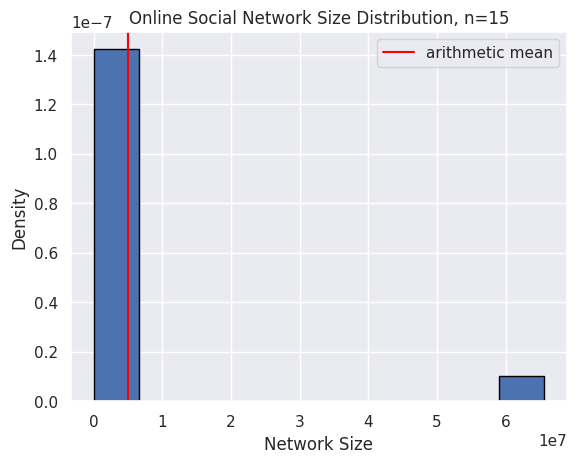

In [ ]:
plot_distribution(
    online_social["nodes"].to_numpy(),
    xlabel="Network Size",
    title="Online Social Network Size Distribution, n={}".format(len(online_social)),
)
plt.ticklabel_format(useOffset=False)

plot_vertical_line(online_social["nodes"].mean(), "arithmetic mean")
plt.legend()

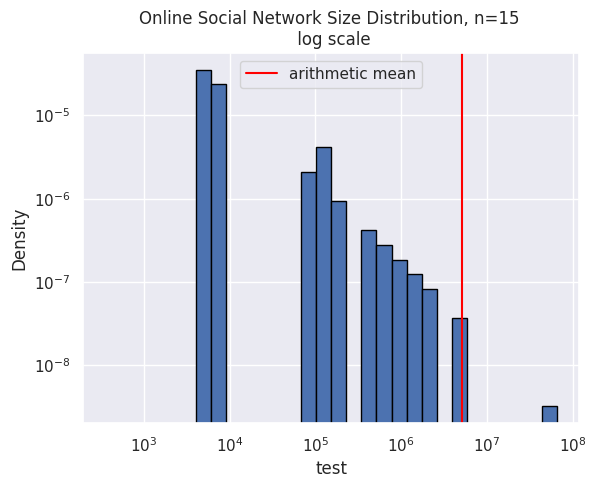

In [ ]:
plot_distribution(
    online_social["nodes"].to_numpy(),
    xlabel="test",
    title="Online Social Network Size Distribution, n={} \n log scale".format(len(online_social)),
    bins=logarithmic_bins(online_social["nodes"].to_numpy(), 30),
    x_scale="log",
    y_scale="log",
)

plot_vertical_line(online_social["nodes"].mean(), "arithmetic mean")
plt.legend()

### The available offline social networks are in generall smaller than online social networks

In [ ]:
sorted(offline_social["nodes"].to_numpy())

[22,
 34,
 35,
 47,
 62,
 75,
 96,
 113,
 180,
 185,
 274,
 329,
 372,
 403,
 800,
 1380,
 10972]

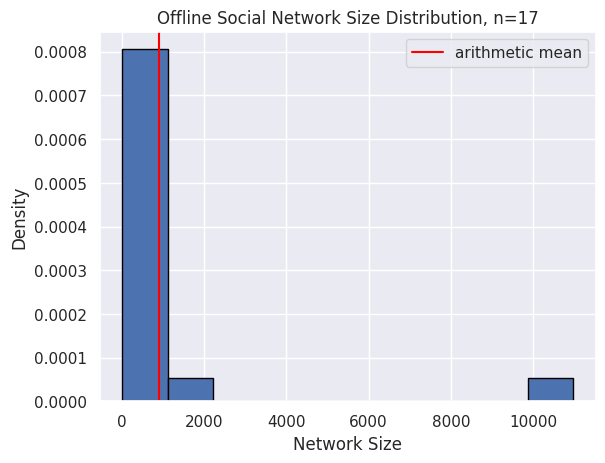

In [ ]:
plot_distribution(
    offline_social["nodes"].to_numpy(),
    xlabel="Network Size",
    title="Offline Social Network Size Distribution, n={}".format(len(offline_social)),
)
plt.ticklabel_format(useOffset=False)

plot_vertical_line(offline_social["nodes"].mean(), "arithmetic mean")
plt.legend()

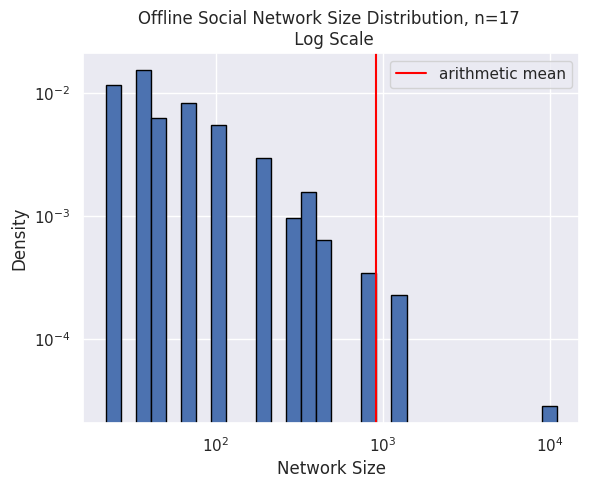

In [ ]:
plot_distribution(
    offline_social["nodes"].to_numpy(),
    xlabel="Network Size",
    title="Offline Social Network Size Distribution, n={} \n Log Scale".format(len(offline_social)),
    bins=logarithmic_bins(offline_social["nodes"].to_numpy(), 30),
    x_scale="log",
    y_scale="log",
)

plot_vertical_line(offline_social["nodes"].mean(), "arithmetic mean")
plt.legend()